<a href="https://colab.research.google.com/github/ShaikKoduruAsif114/Resume-Projects/blob/main/Bitcoin_Price_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
# BTC-USD
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)
stock ="BTC-USD"
bit_coin_data = yf.download(stock, start, end)
bit_coin_data.head()

<ipython-input-2-3447101313>:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bit_coin_data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2015-06-17,249.283997,256.852997,246.475998,250.822998,43858400
2015-06-18,249.007004,252.108002,244.126999,249.427994,30980200
2015-06-19,244.606003,250.977005,243.787003,249.042999,23965300
2015-06-20,245.212006,245.828003,240.626999,244.529999,20608100
2015-06-21,243.944000,245.223999,241.882004,245.100006,10600900


In [3]:
bit_coin_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3653.000000,3653.000000,3653.000000,3653.000000,3.653000e+03
mean,24487.895096,24988.942131,23905.863877,24460.195591,2.111909e+10
std,26786.428572,27285.530473,26202.145626,26756.746663,2.103052e+10
min,210.494995,226.320999,199.567001,210.067993,1.060090e+07
25%,4035.826416,4109.140137,3968.726807,4034.411377,3.671500e+09
50%,11182.806641,11453.079102,10856.141602,11162.167969,1.757056e+10
75%,39294.199219,40180.367188,38112.812500,39250.191406,3.216673e+10
max,111673.281250,111970.171875,109285.070312,111679.359375,3.509679e+11


In [4]:
bit_coin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2015-06-17 to 2025-06-17
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3653 non-null   float64
 1   (High, BTC-USD)    3653 non-null   float64
 2   (Low, BTC-USD)     3653 non-null   float64
 3   (Open, BTC-USD)    3653 non-null   float64
 4   (Volume, BTC-USD)  3653 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 171.2 KB


In [5]:
bit_coin_data.isna().sum()

,,0
Price,Ticker,
Close,BTC-USD,0
High,BTC-USD,0
Low,BTC-USD,0
Open,BTC-USD,0
Volume,BTC-USD,0


In [6]:
Closing_price = bit_coin_data[['Close']]
Closing_price

Price,Close
Ticker,BTC-USD
Date,
2015-06-17,249.283997
2015-06-18,249.007004
2015-06-19,244.606003
2015-06-20,245.212006
2015-06-21,243.944000
...,...
2025-06-12,105929.054688
2025-06-13,106090.968750


Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 1500x500 with 0 Axes>

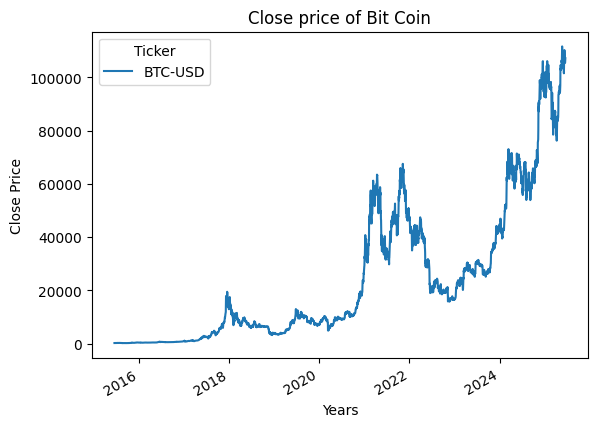

In [7]:
plt.figure(figsize=(15,5))
Closing_price['Close'].plot()
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

In [8]:


# Example DataFrame
df = pd.DataFrame({'CP': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# Calculate 5-day moving average
df['MA_5'] = df['CP'].rolling(window=5).mean()

print(df)

   CP  MA_5
0   1   NaN
1   2   NaN
2   3   NaN
3   4   NaN
4   5   3.0
5   6   4.0
6   7   5.0
7   8   6.0
8   9   7.0
9  10   8.0


In [9]:
for i in range(2015,2025):
    print(list(Closing_price.index.year).count(i))

198
366
365
365
365
366
365
365
365
366


In [10]:
Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()
Closing_price['MA_for_365_days'].head()

<ipython-input-10-686540890>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()


,MA_for_365_days
Date,
2015-06-17,NaN
2015-06-18,NaN
2015-06-19,NaN
2015-06-20,NaN
2015-06-21,NaN


In [11]:
Closing_price['MA_for_365_days'][0:365].tail()

,MA_for_365_days
Date,
2016-06-11,NaN
2016-06-12,NaN
2016-06-13,NaN
2016-06-14,NaN
2016-06-15,363.100168


Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

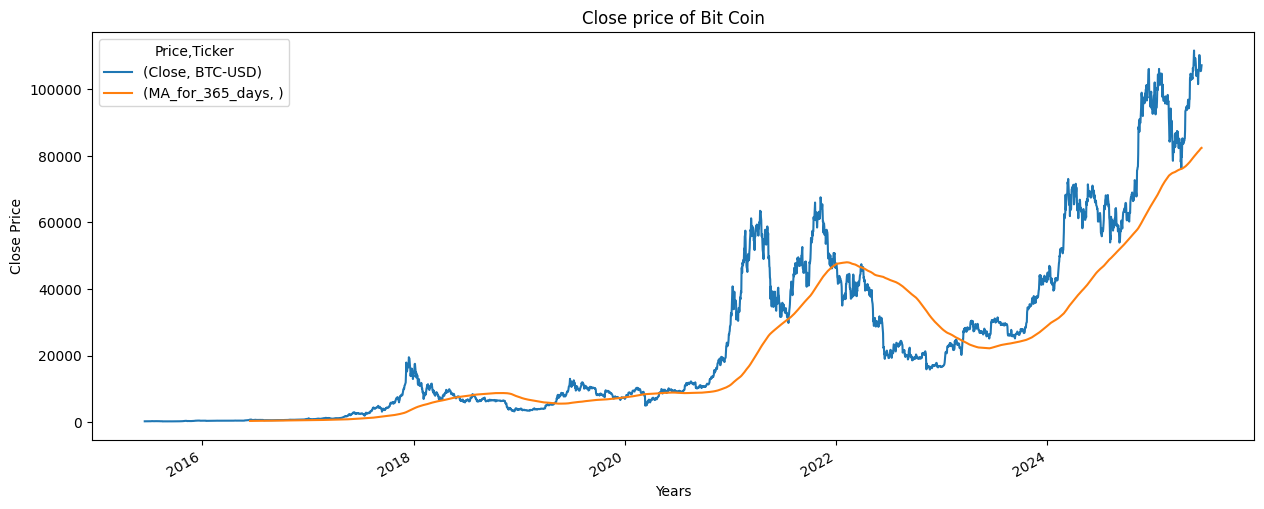

In [12]:
plt.figure()
Closing_price[['Close','MA_for_365_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

<ipython-input-13-1013624105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()


Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

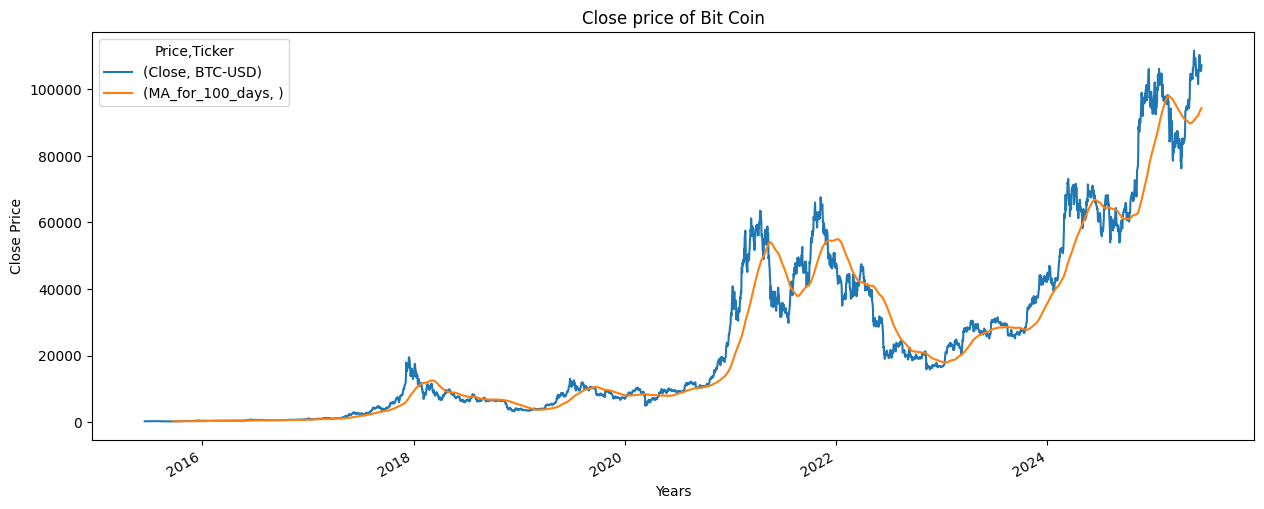

In [13]:
Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()
Closing_price['MA_for_100_days'].head()
plt.figure()
Closing_price[['Close','MA_for_100_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Closing_price[['Close']].values)
scaled_data

array([[3.47999568e-04],
       [3.45514498e-04],
       [3.06030459e-04],
       ...,
       [9.44368204e-01],
       [9.45082498e-01],
       [9.60251658e-01]])

In [15]:
scaled_data.shape

(3653, 1)

In [16]:
x_data = []
y_data = []

base_days = 100

for i in range(base_days,len(scaled_data)):
    x_data.append(scaled_data[i-base_days:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

In [17]:
x_data[0], y_data[0]

(array([[3.47999568e-04],
        [3.45514498e-04],
        [3.06030459e-04],
        [3.11467277e-04],
        [3.00091234e-04],
        [3.27418788e-04],
        [3.03249284e-04],
        [2.69327596e-04],
        [2.89818709e-04],
        [2.96951118e-04],
        [3.63305205e-04],
        [3.45550365e-04],
        [4.17798638e-04],
        [4.71699996e-04],
        [4.31767487e-04],
        [4.02977612e-04],
        [4.11267338e-04],
        [4.52088028e-04],
        [5.51017979e-04],
        [5.25152884e-04],
        [4.99826063e-04],
        [5.40898093e-04],
        [5.26929244e-04],
        [6.67478536e-04],
        [7.41233894e-04],
        [9.00497939e-04],
        [7.31714981e-04],
        [6.90535350e-04],
        [6.75866964e-04],
        [6.06426561e-04],
        [6.18834250e-04],
        [5.77825192e-04],
        [5.66278851e-04],
        [6.14429217e-04],
        [5.86186788e-04],
        [5.98648141e-04],
        [5.88124686e-04],
        [6.97838468e-04],
        [7.0

In [18]:
len_train = int(len(x_data)*0.9)
x_train = x_data[:len_train]
y_train = y_data[:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3197, 100, 1)
(3197, 1)
(356, 100, 1)
(356, 1)


In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)))

model.add(LSTM(64, return_sequences = False))

model.add(Dense(25))

model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
model.fit(x_train, y_train, batch_size = 5, epochs=10)

Epoch 1/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 61s 84ms/step - loss: 0.0011
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - loss: 2.6038e-04
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - loss: 1.8524e-04
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 53s 83ms/step - loss: 1.7531e-04
Epoch 5/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - loss: 1.4886e-04
Epoch 6/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - loss: 1.6492e-04
Epoch 7/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - loss: 1.2871e-04
Epoch 8/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - loss: 1.3356e-04
Epoch 9/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 53s 83ms/step - loss: 1.3291e-04
Epoch 10/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - loss: 1.1001e-04


In [24]:
predictions = model.predict(x_test)
predictions

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


array([[0.5660925 ],
       [0.55723065],
       [0.564716  ],
       [0.5530297 ],
       [0.55829287],
       [0.5751472 ],
       [0.57691383],
       [0.5691291 ],
       [0.5516989 ],
       [0.5219387 ],
       [0.5185849 ],
       [0.53383267],
       [0.5119181 ],
       [0.5194549 ],
       [0.53192085],
       [0.5299297 ],
       [0.5262666 ],
       [0.53127563],
       [0.54364115],
       [0.5581968 ],
       [0.5963396 ],
       [0.5983083 ],
       [0.58855104],
       [0.58670735],
       [0.6120515 ],
       [0.6158344 ],
       [0.6247981 ],
       [0.6189679 ],
       [0.6031207 ],
       [0.5979339 ],
       [0.6018045 ],
       [0.62203836],
       [0.62097746],
       [0.6251949 ],
       [0.6115359 ],
       [0.60586166],
       [0.59108436],
       [0.59824353],
       [0.5614942 ],
       [0.5548706 ],
       [0.53149194],
       [0.49378097],
       [0.5119941 ],
       [0.5040325 ],
       [0.5658832 ],
       [0.5599089 ],
       [0.56034565],
       [0.539

In [25]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 63308.74 ],
       [ 62320.973],
       [ 63155.31 ],
       [ 61852.727],
       [ 62439.37 ],
       [ 64318.004],
       [ 64514.914],
       [ 63647.207],
       [ 61704.39 ],
       [ 58387.23 ],
       [ 58013.41 ],
       [ 59712.97 ],
       [ 57270.312],
       [ 58110.383],
       [ 59499.87 ],
       [ 59277.934],
       [ 58869.633],
       [ 59427.953],
       [ 60806.25 ],
       [ 62428.66 ],
       [ 66680.164],
       [ 66899.6  ],
       [ 65812.03 ],
       [ 65606.53 ],
       [ 68431.45 ],
       [ 68853.11 ],
       [ 69852.234],
       [ 69202.375],
       [ 67436.01 ],
       [ 66857.87 ],
       [ 67289.3  ],
       [ 69544.625],
       [ 69426.37 ],
       [ 69896.46 ],
       [ 68373.99 ],
       [ 67741.52 ],
       [ 66094.4  ],
       [ 66892.38 ],
       [ 62796.195],
       [ 62057.918],
       [ 59452.062],
       [ 55248.7  ],
       [ 57278.785],
       [ 56391.36 ],
       [ 63285.414],
       [ 62619.5  ],
       [ 62668.18 ],
       [ 6034

In [26]:
inv_y_test = scaler.inverse_transform(y_test)

In [27]:
inv_predictions[:5], inv_y_test[:5]

(array([[63308.74 ],
        [62320.973],
        [63155.31 ],
        [61852.727],
        [62439.37 ]], dtype=float32),
 array([[60811.27734375],
        [61604.80078125],
        [60320.13671875],
        [60887.37890625],
        [62678.29296875]]))

In [28]:
plotting_data = pd.DataFrame({
  'original_test_data': inv_y_test.reshape(-1),
'predictions': inv_predictions.reshape(-1),
},
index = Closing_price.index[len_train+100:]
)

plotting_data.head()

,original_test_data,predictions
Date,,
2024-06-26,60811.277344,63308.738281
2024-06-27,61604.800781,62320.972656
2024-06-28,60320.136719,63155.308594
2024-06-29,60887.378906,61852.726562
2024-06-30,62678.292969,62439.371094


Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

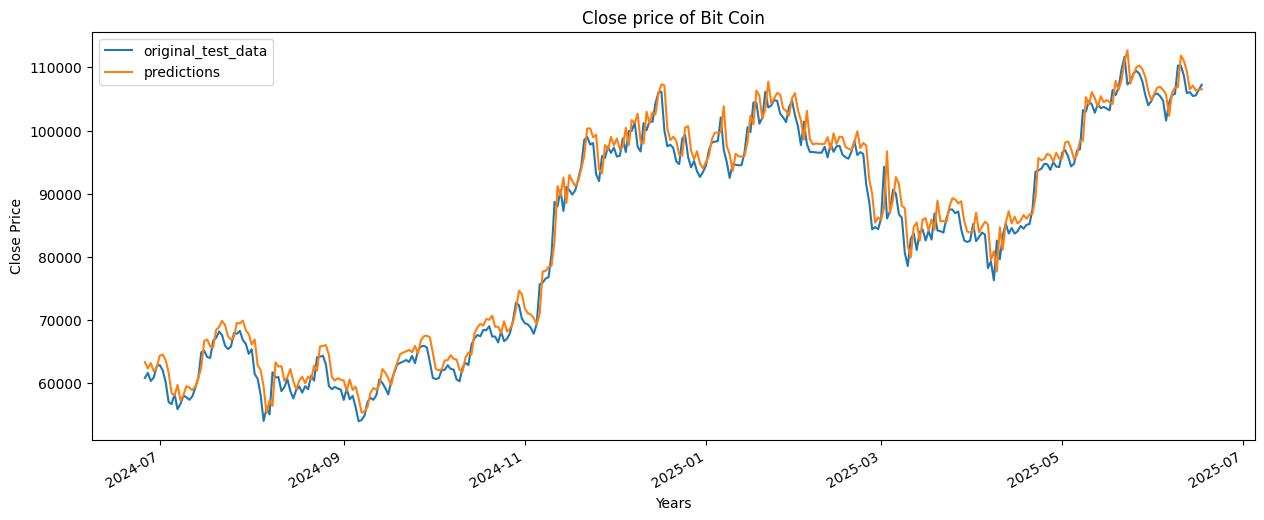

In [29]:
plt.figure()
plotting_data.plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

In [30]:
last_100 = Closing_price[['Close']].tail(100)
last_100.tail()

Price,Close
Ticker,BTC-USD
Date,
2025-06-12,105929.054688
2025-06-13,106090.968750
2025-06-14,105472.406250
2025-06-15,105552.023438
2025-06-17,107242.820312


In [31]:
last_100 = scaler.fit_transform(last_100['Close'].values.reshape(-1,1)).reshape(1,-1,1)
last_100

array([[[0.12228598],
        [0.06384074],
        [0.18615849],
        [0.21045556],
        [0.13543983],
        [0.21742541],
        [0.22799021],
        [0.1781779 ],
        [0.2204362 ],
        [0.18209901],
        [0.29892306],
        [0.22302107],
        [0.2195197 ],
        [0.21356632],
        [0.27632923],
        [0.31713389],
        [0.31636525],
        [0.30024099],
        [0.30804348],
        [0.22827379],
        [0.17868349],
        [0.17125262],
        [0.17730863],
        [0.25132443],
        [0.1755233 ],
        [0.19295533],
        [0.21388609],
        [0.20430995],
        [0.05487171],
        [0.08370824],
        [0.        ],
        [0.17801592],
        [0.0947475 ],
        [0.20148631],
        [0.25465588],
        [0.20939959],
        [0.23361941],
        [0.20894807],
        [0.21925488],
        [0.24360094],
        [0.23103234],
        [0.24833704],
        [0.25146942],
        [0.31769862],
        [0.48500829],
        [0

In [32]:
last_100.shape

(1, 100, 1)

In [33]:
day101 = model.predict(last_100)
day101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[0.8918669]], dtype=float32)

In [34]:
scaler.inverse_transform(day101)

array([[107845.23]], dtype=float32)

In [35]:
# tmr day 101 ==> past 100
#     day 102 ==> day101 + past 99 days
#     day 103 ==> day 102 + + day 101 + past 98 days

In [36]:
# tmr day 101 ==> past 100
#     day 102 ==> day101 + past 99 days
#     day 103 ==> day 102 + + day 101 + past 98 days

# Modify the predict_future function to handle NumPy arrays
def predict_future(no_of_days, prev_100):

    future_predictions = []
    # Ensure prev_100 is a NumPy array
    prev_100 = np.array(prev_100)

    for i in range(no_of_days):
        # Predict the next day
        next_day_scaled = model.predict(prev_100) # model.predict expects numpy array

        # Inverse transform the prediction
        next_day_actual = scaler.inverse_transform(next_day_scaled)

        # Append the actual prediction to the list of future predictions
        future_predictions.append(next_day_actual)

        # Prepare the input for the next prediction
        # We need to remove the oldest day and add the predicted next day
        # next_day_scaled has shape (1, 1) or similar, need to reshape to (1, 1, 1)
        next_day_scaled_reshaped = next_day_scaled.reshape(1, 1, 1)

        # prev_100 has shape (1, 100, 1)
        # We need to remove the first element along the second axis (the time steps)
        # and append the new prediction.
        # Slice to get the last 99 days
        prev_100_sliced = prev_100[:, 1:, :]

        # Concatenate the sliced array with the new prediction along the second axis
        prev_100 = np.concatenate((prev_100_sliced, next_day_scaled_reshaped), axis=1)

    return future_predictions

no_of_days = 10
# Ensure last_100 is in the correct shape and type before calling the function
# last_100 was already created as a numpy array with shape (1, 100, 1)
# So we can pass it directly
future_results = predict_future(no_of_days, last_100)
print(future_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[array([[107845.23]], dtype=float32), array([[108320.84]], dtype=float32), array([[108788.27]], dtype=float32), array([[109245.375]], dtype=float32), array([[109682.48]], dtype=float32), array([[110092.86]], dtype=float32), array([[110473.6]], dtype=float32), array([[110824.37]], dtype=float32), array([[111146.35]], dtype=float32), array([[111441.586]], dtype=float32)]


Text(0.5, 1.0, 'Future Close price of Bit coin')

<Figure size 640x480 with 0 Axes>

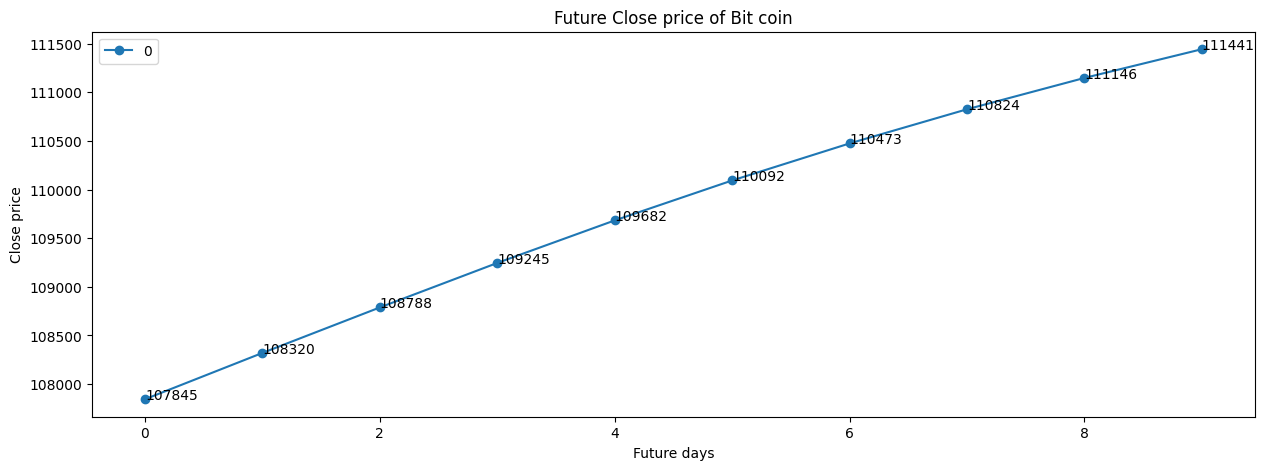

In [37]:
future_results = np.array(future_results).reshape(-1,1)
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15,5), marker='o')
for i in range(len(future_results)):
    plt.text(i,future_results[i],int(future_results[i][0]))
plt.xlabel('Future days')
plt.ylabel('Close price')
plt.title("Future Close price of Bit coin")